# forecasting daily sales by day-specific average sales

### import statements (data manipulation and viz packages)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import datetime

In [2]:
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

### reading data and creating timeseries

In [3]:
data = pd.read_csv('./sample.csv')
data['timestamp'] = pd.to_datetime(data['name-node_ide_dhEmi_$date'])
data = data.set_index('timestamp')

In [4]:
data.head(2)

,name-node_complemento_valorTotal,name-node_dets_0_nItem,name-node_dets_0_prod_indTot,name-node_dets_0_prod_qCom,name-node_dets_0_prod_uCom,name-node_dets_0_prod_vProd,name-node_dets_0_prod_vUnCom,name-node_dets_0_prod_xProd,name-node_dets_1_nItem,name-node_dets_1_prod_indTot,...,name-node_total_icmsTot_vcofins,name-node_total_icmsTot_vicms,name-node_total_icmsTot_vicmsDeson,name-node_total_icmsTot_vii,name-node_total_icmsTot_vipi,name-node_total_icmsTot_vnf,name-node_total_icmsTot_vpis,name-node_total_icmsTot_vst,name-node_versaoDocumento,name-node_versaoDocumento_$numberLong
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-05 12:01:54,24.90,1,1,1.000,UN,3.50,3.5,AGUA,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,24.90,0.0,0.0,1.0,NaN
2016-01-05 12:03:52,92.53,1,1,1.218,KG,83.55,68.6,BUFFET,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,92.55,0.0,0.0,1.0,NaN


### aggregating by day

In [5]:
def _sum(x):
    if len(x) == 0: return 0
    else: return sum(x)

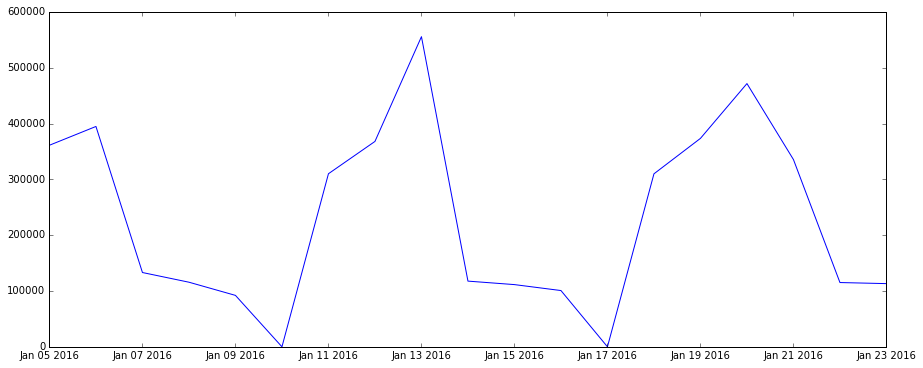

In [6]:
dataset = data['name-node_total_icmsTot_vProd'].groupby(pd.TimeGrouper('D'))\
                                                .transform(np.cumsum)\
                                                .resample('D')\
                                                .apply(_sum)
plt.plot(dataset)
plt.show()

### find day-of-week and then average by day-of-week

In [7]:
df = dataset.to_frame()

In [8]:
df['timestamp'] = df.index

df['weekday'] = df['timestamp'].apply(lambda x: x.weekday())

In [9]:
df.head(3)

,name-node_total_icmsTot_vProd,timestamp,weekday
timestamp,,,
2016-01-05,361228.32,2016-01-05,1
2016-01-06,394866.27,2016-01-06,2
2016-01-07,133111.49,2016-01-07,3


look at sum by day-of-week, noticing again **no sales Sunday (i.e. closed)**

In [10]:
df[['name-node_total_icmsTot_vProd', 'weekday']].groupby('weekday').sum()

,name-node_total_icmsTot_vProd
weekday,
0,620146.54
1,1102783.93
2,1422402.62
3,586374.48
4,342385.91
5,306171.64
6,0.00


### plot average by day-of-week

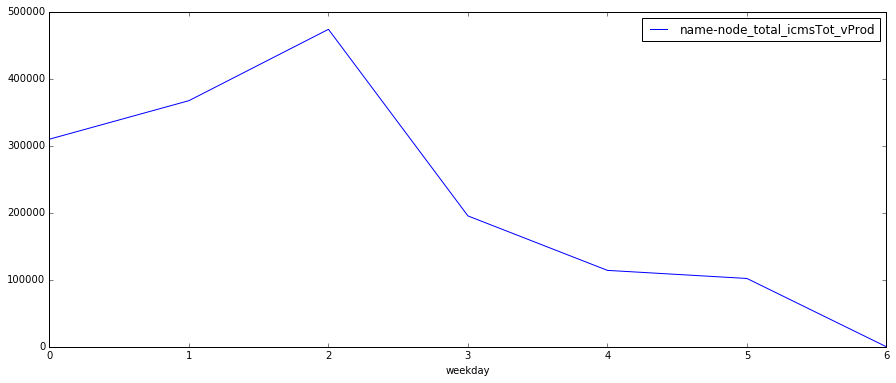

In [11]:
ax = df[['name-node_total_icmsTot_vProd', 'weekday']].groupby('weekday').mean().plot()

### create a list of averages by day-of-week for the next 7 days and append

In [12]:
base = df.last_valid_index() + 7
date_list = [base - datetime.timedelta(days=x) for x in range(0, 7)]

In [13]:
new_dates = pd.DataFrame(date_list)

new_dates = new_dates.set_index(0)

new_dates['timestamp'] = new_dates.index

new_dates['weekday'] = new_dates['timestamp'].apply(lambda x: x.weekday())

In [14]:
new_dates = new_dates.sort_index()

daily_avg = df[['name-node_total_icmsTot_vProd', 'weekday']].groupby('weekday').mean()

daily_avg['weekday'] = daily_avg.index

new_dates = new_dates[['weekday']].join(daily_avg, on='weekday', how='inner', lsuffix='newd', rsuffix='d_avg')

new_dates = new_dates[['name-node_total_icmsTot_vProd', 'weekday']]

forecasted = df[['name-node_total_icmsTot_vProd', 'weekday']].append(new_dates)

In [15]:
forecasted.head(3)

,name-node_total_icmsTot_vProd,weekday
2016-01-05,361228.32,1
2016-01-06,394866.27,2
2016-01-07,133111.49,3


In [16]:
a = forecasted['name-node_total_icmsTot_vProd'][:-6]
b = new_dates['name-node_total_icmsTot_vProd']

t = np.linspace(forecasted.index[0].value,forecasted.last_valid_index().value, len(forecasted))
t = pd.to_datetime(t)

In [17]:
t

DatetimeIndex(['2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10', '2016-01-11', '2016-01-12',
               '2016-01-13', '2016-01-14', '2016-01-15', '2016-01-16',
               '2016-01-17', '2016-01-18', '2016-01-19', '2016-01-20',
               '2016-01-21', '2016-01-22', '2016-01-23', '2016-01-24',
               '2016-01-25', '2016-01-26', '2016-01-27', '2016-01-28',
               '2016-01-29', '2016-01-30'],
              dtype='datetime64[ns]', freq=None)

### plot sales with the "day-of-week-average forecast"

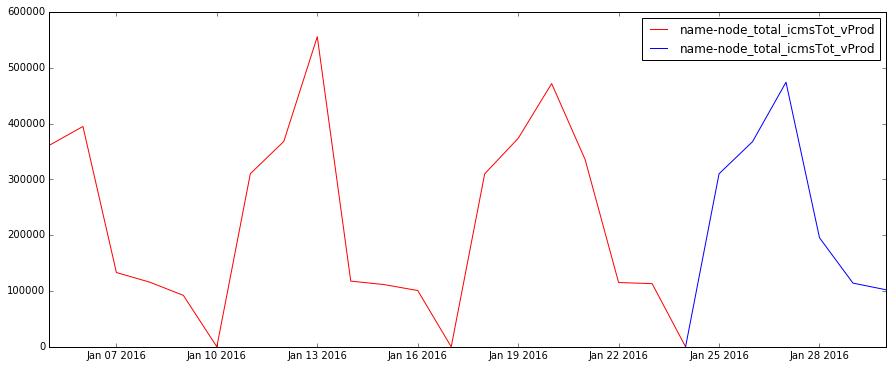

In [19]:
plt.plot(t[:-6],a,'r') # plotting t,a separately 
plt.plot(t[-7:],b,'b') # plotting t,b separately 
# plt.plot(t,c,'g') # plotting t,c separately 
plt.legend(loc='best')
plt.show()